**Word Embeddings & NLP Algorithms (BoW, TF-IDF, Word2Vec)**



**Difference between Embedding and Dummy Variables**
    
- **Dummy Variables (One-Hot Encoding)**:


  - Each word is represented as a **binary vector** (0/1).  
  - No meaning or relationship between words.  
  - Example: "cat" = [1,0,0], "dog" = [0,1,0].  

- **Word Embeddings (Word2Vec, GloVe, FastText)**:


  - Each word is represented as a **dense vector of real numbers**.  
  - Captures **semantic meaning** (e.g., India ≈ Bharat, not Australia).  
  - Example: "king - man + woman ≈ queen".  


# Bag of Words (BoW)

BoW converts text into numbers based on word frequency (or presence/absence).  


**Limitation:**  
    
- Common words ("the", "is") treated equally as rare words.  
- Ignores word meaning & order.

The **CountVectorizer** converts text into a numerical matrix.  
**Vocabulary** → All unique words found across the sentences.  
  Example: `['ahead', 'ai', 'career', 'data', 'genai', 'great', 'has', 'science']`  

- **BoW Representation** →  

  Each row = a sentence  
  Each column = a word from the vocabulary  
  Each value = how many times the word appears in that sentence  

**Example:**

Sentence 1: `"data science and ai genai has great career ahead"`  
Word **'data'** appears **1 time**  

Sentence 2: `"data data science and ai genai has great career ahead"`  
Word **'data'** appears **2 times** (others appear once)  


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

# Example sentences
sentences = [
    "data science and ai genai has great career ahead",
    "data data science and ai genai has great career ahead"
]

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(sentences)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Representation:\n", bow.toarray())

Vocabulary: ['ahead' 'ai' 'and' 'career' 'data' 'genai' 'great' 'has' 'science']
BoW Representation:
 [[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]]


# TF-IDF (Term Frequency – Inverse Document Frequency)

- **TF (Term Frequency)** = count(word) / total words in sentence  
- **IDF (Inverse Document Frequency)** = log(Total Sentences / Sentences Containing Word)  
- Reduces weight of **common words**, increases weight of **rare but important words**.


Unlike **BoW**, which only counts word frequency,  
**TF-IDF** gives higher weight to *important words* and reduces the weight of *common words*.

**Formula:**
  
- **TF (Term Frequency)** = (Word count in sentence) / (Total words in sentence)  
- **IDF (Inverse Document Frequency)** = log(Total Sentences / Sentences containing the word)  
- **TF-IDF = TF × IDF**

**Example with our sentences:**
1. `"data science and ai genai has great career ahead"`  
2. `"data data science and ai genai has great career ahead"`  
3. `"data ok data science and ai genai has great career ahead"`  

- Word **"data"** appears in all 3 sentences → IDF is **low** → weight is reduced.  
- Word **"ok"** appears only once in one sentence → IDF is **high** → weight is increased.  

**Output:**
  
- **Vocabulary** → All unique words across sentences  
  Example: `['ahead', 'ai', 'career', 'data', 'genai', 'great', 'has', 'ok', 'science']`

- **TF-IDF Representation (matrix)** → Each row = sentence, each column = word, each value = TF-IDF weight.

The numbers are **decimal values** (not just counts), showing relative importance of words in each sentence.



**Insight:**  
- Common words like `"data"` get smaller values (low importance).  
- Rare words like `"ok"` get higher values (high importance).


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = [
    "data science and ai genai has great career ahead",
    "data data science and ai genai has great career ahead",
    "data ok data science and ai genai has great career ahead"
]

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(sentences)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("TF-IDF Representation:\n", tfidf.toarray())

Vocabulary: ['ahead' 'ai' 'and' 'career' 'data' 'genai' 'great' 'has' 'ok' 'science']
TF-IDF Representation:
 [[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
  0.33333333 0.33333333 0.         0.33333333]
 [0.28867513 0.28867513 0.28867513 0.28867513 0.57735027 0.28867513
  0.28867513 0.28867513 0.         0.28867513]
 [0.25935344 0.25935344 0.25935344 0.25935344 0.51870689 0.25935344
  0.25935344 0.25935344 0.43912355 0.25935344]]


# Word Embeddings (Word2Vec)

Unlike BoW & TF-IDF (frequency-based), **Word2Vec learns meaning** from context.  

Example:  

- “India” is closer to “Bharat” than to “Australia”.  
- “Fruit” is closer to “Mango” than to “Car”.  

We use **Gensim Word2Vec** to build embeddings.



Unlike **BoW** and **TF-IDF**, which are frequency-based,  
**Word2Vec** learns **dense vector representations** of words that capture **semantic meaning**.

**Key Concepts:**
- Each word is mapped to a **vector of real numbers** (e.g., 50-dimensional here).  
- Words that appear in **similar contexts** will have **similar vectors**.  
- Example: "india" and "bharat" should be closer than "india" and "australia".

**Parameters we used:**

- `vector_size=50` → Each word is represented by a 50-dimensional vector.  
- `window=3` → Context window size (how many words before/after are considered).  
- `min_count=1` → Include all words, even those that appear once.  
- `sg=1` → Skip-gram model (better for small datasets).  

**Output:**
- `model.wv['india']` → Shows the embedding (vector) for "india".  
- `model.wv.most_similar("india")` → Finds words closest to "india" in vector space.  

**Insight:**
- Word2Vec captures **relationships & meaning**:
  - "india" ≈ "bharat"
  - "fruit" ≈ "apple", "mango"
- This is the basis for **semantic search, recommendations, and modern NLP models**.

Unlike BoW/TF-IDF, Word2Vec **does not just count words** – it learns their meaning from context.


In [ ]:
#!pip install gensim

   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.4 MB 1.8 MB/s eta 0:00:14
   - -------------------------------------- 1.0/24.4 MB 1.9 MB/s eta 0:00:13
   -- ------------------------------------- 1.3/24.4 MB 1.9 MB/s eta 0:00:13
   -- ------------------------------------- 1.6/24.4 MB 1.7 MB/s eta 0:00:14
   --- ------------------------------------ 1.8/24.4 MB 1.5 MB/s eta 0:00:16
   --- ------------------------------------ 2.1/24.4 MB 1.4 MB/s eta 0:00:16
   --- ------------------------------------ 2.4/24.4 MB 1.3 MB/s eta 0:00:17
   ---- ----------------------------------- 2.6/24.4 MB 1.4 MB/s eta 0:00:16
   ---- ----------------------------------- 2.9/24.4 MB 1.4 MB/s eta 0:00:16
   ---- ----------------------------------- 2.9/24.4 MB 1.4 MB/s eta 0:00:16
   ----- -----------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from gensim.models import Word2Vec

# Sample corpus (tokenized sentences)
corpus = [
    ["india", "bharat", "delhi"],
    ["uk", "england", "london"],
    ["fruit", "apple", "mango"],
    ["country", "nation", "republic"],
    ["ireland", "dublin", "europe"]
]

# Train Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=50, window=3, min_count=1, sg=1)

# Get vector for a word
print("Vector for 'india':\n", model.wv['india'])

# Find most similar words
print("\nMost similar to 'india':", model.wv.most_similar("india"))

Vector for 'india':
 [ 1.63362399e-02 -8.88606533e-03  1.79708675e-02  1.65073294e-02
 -8.87044426e-03  6.06210204e-04  8.54898244e-03 -7.85264000e-03
 -1.11199310e-02 -1.30246449e-02 -1.34147645e-03 -5.91843156e-04
  8.92616995e-03 -4.94810799e-03 -3.45218170e-04  4.92375158e-03
  9.73519776e-03 -6.16168982e-05 -1.26788188e-02 -1.85216144e-02
  5.33151615e-05  1.33237885e-02  2.93204538e-03 -1.79330446e-02
 -1.58772096e-02  1.31038046e-02 -7.57136103e-03  1.25099849e-02
 -1.33620640e-02  1.69593245e-02 -1.30326487e-02  6.57603983e-03
 -2.11397163e-03 -1.35750556e-02 -6.57519326e-03 -2.32282397e-03
 -1.09418798e-02 -2.42269505e-03 -1.51266269e-02  5.29331900e-03
  1.81402974e-02 -4.75450046e-03 -1.95302011e-03  7.02712312e-03
  1.73301753e-02 -1.18437055e-02 -1.37751559e-02 -5.86596970e-03
  1.82953924e-02  1.73253531e-03]

Most similar to 'india': [('uk', 0.5292955636978149), ('europe', 0.21057099103927612), ('delhi', 0.18857939541339874), ('london', 0.11843332648277283), ('country', 

# Word2Vec Embedding Visualization

- Each word in the corpus is represented as a **50-dimensional vector**.  
- To visualize, we used **PCA** to reduce embeddings to 2D.  
- Similar words (e.g., "india" & "bharat", "fruit" & "mango") should appear **closer** together on the plot.  

This shows how Word2Vec captures **semantic meaning** beyond raw frequency.  

This way, you’ll see clusters:

- "india" & "bharat" near each other

- "fruit", "apple", "mango" grouped together

- "uk", "england", "london" close

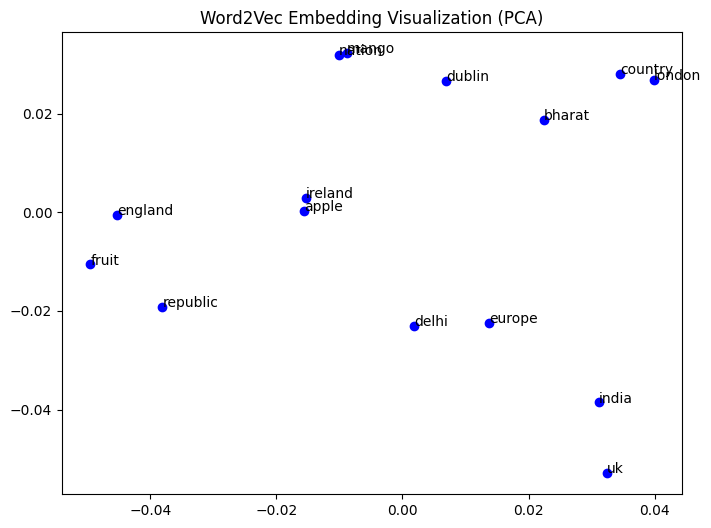

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract all word vectors
words = list(model.wv.key_to_index.keys())
word_vectors = model.wv[words]

# Reduce dimensions from 50 → 2 for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot embeddings
plt.figure(figsize=(8,6))
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], c='blue')

for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_vectors[i,0], reduced_vectors[i,1]))

plt.title("Word2Vec Embedding Visualization (PCA)")
plt.show()

**Key Insights**
  
- **BoW** → Simple, but ignores meaning.  
- **TF-IDF** → Better, highlights important words.  
- **Word2Vec** → Best for meaning & relationships.  

**Real-World Usage**
                     
- **BoW/TF-IDF** → Text classification, spam detection.  
- **Word2Vec** → Semantic search, recommendations, chatbots.  
- **Embeddings** → Stored in **Vector Databases** (e.g., Pinecone, FAISS) for **RAG (Retrieval-Augmented Generation)** in LLMs.  
